In [2]:
import pandas as pd
import numpy as np

In [3]:
# Reading the csv file
df_cars = pd.read_csv("used_cars.csv")
df_cars.head(10)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
5,Acura,ILX 2.4L,2016,"136,397 mi.",Gasoline,2.4 Liter,F,Silver,Ebony.,None reported,NaN,"$14,798"
6,Audi,S3 2.0T Premium Plus,2017,"84,000 mi.",Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Black,None reported,Yes,"$31,000"
7,BMW,740 iL,2001,"242,000 mi.",Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,Green,Green,None reported,Yes,"$7,300"
8,Lexus,RC 350 F Sport,2021,"23,436 mi.",Gasoline,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,Black,Black,None reported,Yes,"$41,927"
9,Tesla,Model X Long Range Plus,2020,"34,000 mi.",NaN,534.0HP Electric Motor Electric Fuel System,A/T,Black,Black,None reported,Yes,"$69,950"


In [4]:
# Color is not likely to affect resale value unless Very High end model so we drop these columns
df_cars.drop(['ext_col','int_col'],axis=1, inplace=True)
df_cars.shape

(4009, 10)

In [5]:
print(df_cars.describe)

<bound method NDFrame.describe of          brand                            model  model_year      milage  \
0         Ford  Utility Police Interceptor Base        2013  51,000 mi.   
1      Hyundai                     Palisade SEL        2021  34,742 mi.   
2        Lexus                    RX 350 RX 350        2022  22,372 mi.   
3     INFINITI                 Q50 Hybrid Sport        2015  88,900 mi.   
4         Audi        Q3 45 S line Premium Plus        2021   9,835 mi.   
...        ...                              ...         ...         ...   
4004   Bentley             Continental GT Speed        2023     714 mi.   
4005      Audi             S4 3.0T Premium Plus        2022  10,900 mi.   
4006   Porsche                           Taycan        2022   2,116 mi.   
4007      Ford                     F-150 Raptor        2020  33,000 mi.   
4008       BMW                     X3 xDrive30i        2020  43,000 mi.   

          fuel_type                                             e

#### Cleaning the data

In [6]:
# missing values
df_cars.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
accident        113
clean_title     596
price             0
dtype: int64

In [7]:
# filling the missing fuel_type with mode, accident to no and clean_title with yes
df_cars['fuel_type']=df_cars['fuel_type'].fillna(df_cars['fuel_type'].mode()[0])


# We change the whole columns to integer after filling it where 1 represents at least one accident
df_cars['accident']=df_cars['accident'].fillna('None reported')
df_cars['accident']=df_cars['accident'].apply(
    lambda x : 0 if x == "None reported" else 1
    )

df_cars['clean_title']=df_cars['clean_title'].fillna('No')
df_cars['clean_title'] = df_cars['clean_title'].apply(lambda x: 1 if x == 'Yes' else 0)



df_cars.isnull().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
accident        0
clean_title     0
price           0
dtype: int64

In [8]:
len(df_cars['engine'].value_counts())
df_cars

,brand,model,model_year,milage,fuel_type,engine,transmission,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,1,1,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,1,1,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,0,0,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,0,1,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,0,0,"$34,999"
...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,714 mi.,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,0,1,"$349,950"
4005,Audi,S4 3.0T Premium Plus,2022,"10,900 mi.",Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,0,1,"$53,900"
4006,Porsche,Taycan,2022,"2,116 mi.",Gasoline,Electric,Automatic,0,0,"$90,998"
4007,Ford,F-150 Raptor,2020,"33,000 mi.",Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,0,1,"$62,999"


In [9]:
# handling the engine columns - we extract the engine size and classify based on that
import re

def extract_engine_size(val):
    match = re.search(r'(\d+(\.\d+)?)\s*[lL]', str(val))
    if match:
        return float(match.group(1))
    return None


df_cars['engine_size'] = df_cars['engine'].apply(extract_engine_size)
df_cars.drop(columns='engine', inplace=True)

In [10]:
df_cars.isnull().sum()
df_cars = df_cars[df_cars['engine_size'].notnull()]

In [11]:
df_cars['fuel_type'].value_counts()
df_cars = pd.get_dummies(df_cars, columns=['fuel_type'])

In [12]:
def simplify_transmission(value):
    val = value.lower()
    if 'cvt' in val:
        return 'CVT'
    elif 'm/t' in val or 'manual' in val:
        return 'Manual'
    elif 'a/t' in val or 'automatic' in val or 'auto-shift' in val:
        return 'Automatic'
    else:
        return 'Automatic'

df_cars.loc[:, 'transmission'] = df_cars['transmission'].apply(simplify_transmission)
df_cars = pd.get_dummies(df_cars, columns=['transmission'])

# since mode is automatic we fill nan with Automatic

In [13]:
df_cars['milage'].value_counts()

milage
110,000 mi.    15
45,000 mi.     15
55,000 mi.     13
120,000 mi.    12
92,000 mi.     12
               ..
39,611 mi.      1
92,700 mi.      1
101,387 mi.     1
36,544 mi.      1
115,872 mi.     1
Name: count, Length: 2682, dtype: int64

In [14]:
df_cars['milage'] = df_cars['milage'].str.replace('mi.', '', regex=False)
df_cars['milage'] = df_cars['milage'].str.replace(',', '')
df_cars['milage'] = df_cars['milage'].str.strip()

df_cars['milage'] = pd.to_numeric(df_cars['milage'], errors='coerce')
df_cars['milage'].describe()


count      3792.000000
mean      66088.342563
std       52345.615006
min         100.000000
25%       24211.500000
50%       54321.500000
75%       95462.500000
max      405000.000000
Name: milage, dtype: float64

In [15]:
df_cars['price'] = df_cars['price'].replace('[\$,]', '', regex=True).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Acer\AppData\Local\Temp\ipykernel_40792\117747094.py:1: SyntaxWarning: invalid escape sequence '\$'
  df_cars['price'] = df_cars['price'].replace('[\$,]', '', regex=True).astype(float)


In [16]:
df_cars

,brand,model,model_year,milage,accident,clean_title,price,engine_size,fuel_type_Diesel,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,transmission_Automatic,transmission_CVT,transmission_Manual
0,Ford,Utility Police Interceptor Base,2013,51000,1,1,10300.0,3.7,False,True,False,False,False,True,False,False
1,Hyundai,Palisade SEL,2021,34742,1,1,38005.0,3.8,False,False,True,False,False,True,False,False
2,Lexus,RX 350 RX 350,2022,22372,0,0,54598.0,3.5,False,False,True,False,False,True,False,False
3,INFINITI,Q50 Hybrid Sport,2015,88900,0,1,15500.0,3.5,False,False,False,True,False,True,False,False
4,Audi,Q3 45 S line Premium Plus,2021,9835,0,0,34999.0,2.0,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4003,Mercedes-Benz,E-Class E 300 4MATIC,2018,53705,1,1,25900.0,2.0,False,False,True,False,False,True,False,False
4004,Bentley,Continental GT Speed,2023,714,0,1,349950.0,6.0,False,False,True,False,False,True,False,False
4005,Audi,S4 3.0T Premium Plus,2022,10900,0,1,53900.0,3.0,False,False,True,False,False,True,False,False
4007,Ford,F-150 Raptor,2020,33000,0,1,62999.0,3.5,False,False,True,False,False,True,False,False


In [17]:
df_cars['model'].value_counts()

df_cars = pd.get_dummies(df_cars, columns=['brand'], drop_first=True)


In [18]:
model_freq = df_cars['model'].value_counts()
threshold = 10
frequent_models = model_freq[model_freq >= threshold].index

df_cars['model'] = df_cars['model'].apply(lambda x: x if x in frequent_models else 'Other')


model_counts = df_cars['model'].value_counts()
df_cars['model_encoded'] = df_cars['model'].map(model_counts)

df_cars['model_encoded'].value_counts()
df_cars.drop(columns='model', inplace=True)

df_cars.reset_index(drop = True, inplace=True)
df_cars.columns


Index(['model_year', 'milage', 'accident', 'clean_title', 'price',
       'engine_size', 'fuel_type_Diesel', 'fuel_type_E85 Flex Fuel',
       'fuel_type_Gasoline', 'fuel_type_Hybrid', 'fuel_type_Plug-In Hybrid',
       'transmission_Automatic', 'transmission_CVT', 'transmission_Manual',
       'brand_Alfa', 'brand_Aston', 'brand_Audi', 'brand_BMW', 'brand_Bentley',
       'brand_Bugatti', 'brand_Buick', 'brand_Cadillac', 'brand_Chevrolet',
       'brand_Chrysler', 'brand_Dodge', 'brand_FIAT', 'brand_Ferrari',
       'brand_Ford', 'brand_GMC', 'brand_Genesis', 'brand_Honda',
       'brand_Hummer', 'brand_Hyundai', 'brand_INFINITI', 'brand_Jaguar',
       'brand_Jeep', 'brand_Karma', 'brand_Kia', 'brand_Lamborghini',
       'brand_Land', 'brand_Lexus', 'brand_Lincoln', 'brand_Lotus',
       'brand_MINI', 'brand_Maserati', 'brand_Maybach', 'brand_Mazda',
       'brand_McLaren', 'brand_Mercedes-Benz', 'brand_Mercury',
       'brand_Mitsubishi', 'brand_Nissan', 'brand_Plymouth', 'brand_Pon

### Training the model

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

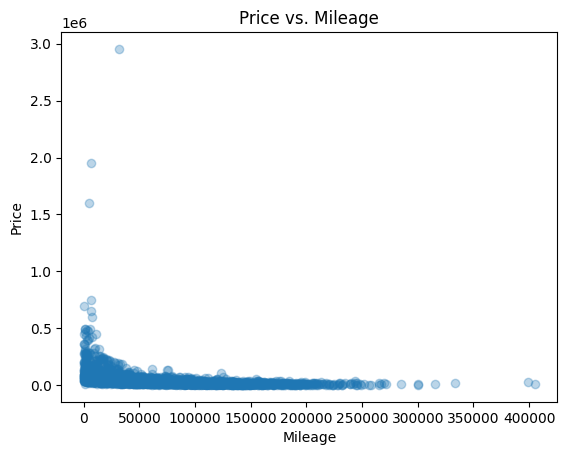

In [20]:
plt.scatter(df_cars['milage'], df_cars['price'], alpha=0.3)
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Price vs. Mileage')
plt.show()

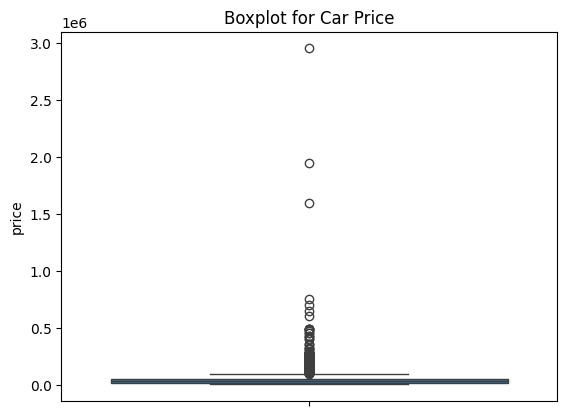

In [21]:
# Trying to spot outliers 
sns.boxplot(y=df_cars['price'])
plt.title('Boxplot for Car Price')
plt.show()

# not clear

In [22]:
Q1 = df_cars['price'].quantile(0.25)
Q3 = df_cars['price'].quantile(0.75)
IQR = Q3 - Q1

# Outlier thresholds
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_cars[(df_cars['price'] < lower) | (df_cars['price'] > upper)]
print("Outliers detected:", len(outliers))

Outliers detected: 245


In [23]:
df_cars = df_cars[(df_cars['price'] >= lower) & (df_cars['price'] <= upper)]

In [24]:
from sklearn.model_selection import train_test_split

x = df_cars.drop(columns='price')
y = df_cars['price']

train, test = train_test_split(df_cars, test_size=0.33, random_state=42)

In [25]:
train_x = train.drop(columns='price')
train_y = train['price']

In [26]:
test_x = test.drop(columns='price')
test_y = test['price']

In [27]:
# we are using linear regression method to train our model
from sklearn.ensemble import RandomForestRegressor

rndm_fr = RandomForestRegressor(n_estimators=100, random_state=7)
rndm_fr.fit(train_x, train_y)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Report 

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = rndm_fr.predict(test_x)

# 3. Evaluate the model
mae = mean_absolute_error(test_y, y_pred)
mse = mean_squared_error(test_y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(test_y, y_pred)

# 4. Print the scores
print("Random Forest Evaluation:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


Random Forest Evaluation:
MAE: 6435.788613313814
MSE: 83473347.75110166
RMSE: 9136.374978682828
R² Score: 0.804844837333955


## Tuning the model

In [29]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [100, 200],             
    'max_depth': [10, 20, None],             
    'min_samples_split': [2, 5],             
    'min_samples_leaf': [1, 2]             
}


In [30]:
grid_search = GridSearchCV(
    estimator=rndm_fr,
    param_grid=parameters,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

In [31]:
grid_search.fit(train_x, train_y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


,estimator,RandomForestR...andom_state=7)
,param_grid,"{'max_depth': [10, 20, ...], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], 'n_estimators': [100, 200]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [32]:
grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [33]:
grid_search.best_score_

np.float64(0.7797025550936633)

In [34]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(test_x)

In [35]:
print("R² Score:", r2_score(test_y, y_pred))

R² Score: 0.8073285702836579


### Exporting the model

In [ ]:
import joblib

joblib.dump(rndm_fr, 'car_price_predictor.pkl')

['car_price_predictor.pkl']